In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import cmath
import csv


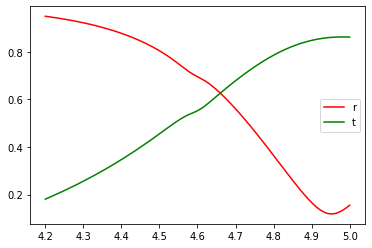

In [30]:

filename = "D:/Coupled-mode Theory/simu for fitting/2-0.9.txt"

with open (filename,'rt',encoding='UTF-8') as raw_data:
  data = np.loadtxt(raw_data,delimiter='\t')
xdata = data[:,0]
rdata = data[:,1] + data[:,2] * 1j
rdata = abs(rdata)                              # 拟合的幅值
plt.plot(xdata, rdata, 'r-', label='r')

tdata = data[:,3] + data[:,4] * 1j
tdata = abs(tdata)
plt.plot(xdata, tdata, 'g-', label='t')

plt.legend()
plt.show()

comb_Y = np.append(rdata, tdata)
comb_X = np.append(xdata, xdata)

In [3]:
# 定义需要拟合的函数
def func_t(x, f1re, f1im, f2re, f2im, kre, kim, Tao1Are, Tao1Aim, Tao2Are, Tao2Aim, d, yita):
    f1 = f1re + f1im*1j
    f2 = f2re + f2im*1j
    k = kre + kim*1j
    Tao1A = Tao1Are + Tao1Aim*1j
    Tao2A = Tao2Are + Tao2Aim*1j

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*cmath.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    t_up = (W_3*2*cmath.cos(2*yita) - (W_1)-(W_2))*Tao1
    t_down = W_2 * W_1 - (W_3)**2
    ft = t_up / t_down + 1
    return abs(ft)

In [4]:
def func_r(x, f1re, f1im, f2re, f2im, kre, kim, Tao1Are, Tao1Aim, Tao2Are, Tao2Aim, d, yita):
    f1 = f1re + f1im*1j
    f2 = f2re + f2im*1j
    k = kre + kim*1j
    Tao1A = Tao1Are + Tao1Aim*1j
    Tao2A = Tao2Are + Tao2Aim*1j

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*cmath.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    r_up = (W_3*(-2) + (W_1)*cmath.exp(-2j*yita) + (W_2)*cmath.exp(2j*yita))*Tao1
    r_down = W_2 * W_1 - (W_3)**2
    fr = r_up /r_down
    return abs(fr)

In [7]:
def fun_comb(x_comb, f1re, f1im, f2re, f2im, kre, kim, Tao1Are, Tao1Aim, Tao2Are, Tao2Aim, d, yita):
    extract1 = x_comb[:len(xdata)]
    extract2 = x_comb[len(xdata):]

    result1 = func_r(extract1, f1re, f1im, f2re, f2im, kre, kim, Tao1Are, Tao1Aim, Tao2Are, Tao2Aim, d, yita)
    result2 = func_t(extract2, f1re, f1im, f2re, f2im, kre, kim, Tao1Are, Tao1Aim, Tao2Are, Tao2Aim, d, yita)

    return np.append(result1, result2)

In [31]:
b0 = [5.50268618 ,-0.35896078 ,11.96337717 ,-9.07420705  ,0.2521055  ,-0.01654019    ,0.41055559 , 0.85723877  ,9.08580546  ,6.64634102  ,0.57181859  ,1.52199651]
# b0 = popt
bound = ([-30,-30,-30,-30,-10,-10,-10,-10,-10,-10,0,-cmath.pi], [30,30,30,30,10,10,10,10,10,10,10,cmath.pi])

popt, pcov = curve_fit(fun_comb, comb_X, comb_Y, b0, bounds=bound)
print(popt)

[ 5.06729225 -0.39610704 13.37876789 -8.87545166  0.61432249 -0.10913747
  0.37517029  1.06015306  8.79451799  6.25758043  1.81482753  1.56788916]


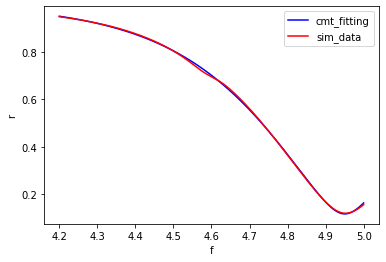

In [32]:
plt.plot(xdata, func_r(xdata, *popt), 'b-', label='cmt_fitting')
plt.plot(xdata, rdata, 'r-', label='sim_data')
plt.xlabel('f')
plt.ylabel('r')
plt.legend()
plt.show()

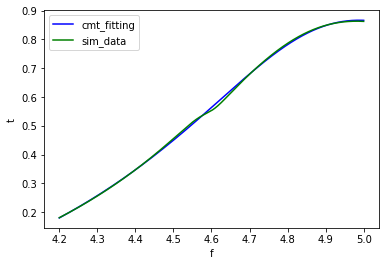

In [33]:
plt.plot(xdata, func_t(xdata, *popt), 'b-', label='cmt_fitting')
plt.plot(xdata, tdata, 'g-', label='sim_data')
plt.xlabel('f')
plt.ylabel('t')
plt.legend()
plt.show()
